In [241]:
# this notebook is for the telco_churn portion of the regression exercises from 19 Mar 19,
# located at: https://ds.codeup.com/Regression_Python/

### Regression.ipynb

#### Hackney, Chad

#### 19 Mar 19

Q's:  2a-o,  3a-i,  4a-f

#### Using telco_churn database, predict total charges

Using the telco_churn database, extract a table for each customer with a 2-year contract and include the following information:  customer id, tenure, monthly charges, and total charges.

In [242]:
# Done.

Export the table to a csv

In [243]:
# Done

# "telco_churn_extract2-19Mar19.csv"
# /Users/rachelreuter/regression/telco_churn_extract2-19Mar19.csv

Create a jupyter notebook titled regression

In [244]:
# Done

#### Prepare the Environment

Do not copy and paste...manually type so that you remember what you need and why you are importing the things that you are. You will do this often!

In [245]:
# # ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

# Wrangling
import numpy as np
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.feature_selection import f_regression

Read the information from the customers table into a dataframe.

Pandas: read a local csv

In [246]:
path = '/Users/rachelreuter/regression/'
df_telco_2yr = pd.read_csv(path + 'telco_churn_extract2-19Mar19.csv')

In [247]:
type(df_telco_2yr)

pandas.core.frame.DataFrame

How many rows are in your dataframe?

In [248]:
df_telco_2yr.shape

# there are 1695 rows, and four columns.

#also 'df_telco_2yr[0]' will give the rows

(1695, 4)

In [249]:
df_telco_2yr.columns

Index(['customer_id', 'tenure', 'monthly_charges', 'total_charges'], dtype='object')

In [250]:
df_telco_2yr.index

RangeIndex(start=0, stop=1695, step=1)

In [251]:
df_telco_2yr.size
# this counts the number of values across all four fields (1695 rows * 4 columns = 6780)

6780

In [252]:
df_telco_2yr.values

array([['0013-SMEOE', 71, 109.7, '7904.25'],
       ['0014-BMAQU', 63, 84.65, '5377.8'],
       ['0016-QLJIS', 65, 90.45, '5957.9'],
       ...,
       ['9975-GPKZU', 46, 19.75, '856.5'],
       ['9993-LHIEB', 67, 67.85, '4627.65'],
       ['9995-HOTOH', 63, 59.0, '3707.6']], dtype=object)

What is the data type of the field containing the customer ids?

In [253]:
df_telco_2yr.dtypes

# df_telco_2yr['field_name'].dtype also gets the dtype for a single column.

# customer_id is datatype: object

# will need to convert the total_charges field currently shown as object... but the next step shows some blanks.
# need to first convert the blanks to zeroes

customer_id         object
tenure               int64
monthly_charges    float64
total_charges       object
dtype: object

How many missing values are in each variable?

In [256]:
print(df_telco_2yr.isnull().sum())
# now, no missing values in any variable.

customer_id        0
tenure             0
monthly_charges    0
total_charges      0
dtype: int64


In [343]:
print(df_telco_2yr.isna().sum())

customer_id        0
tenure             0
monthly_charges    0
total_charges      0
dtype: int64


In [ ]:
# Otherways to convert empty strings to :
# df2 = df.convert_objects(convert_numeric=True)
# df2.isnull().sum()

# df3 = df.replace(r'\s+', np.nan, regex=True)
# df3.isnull().sum()
# "r" means you're going to follow this with a raw string expression


Fill any missing values with 0.

In [254]:
#  handy code here:   use of lambda to convert '' to '0'
#  also convert object/str to float

# replace blanks with zeroes '0'
df_telco_2yr['total_charges'] = df_telco_2yr['total_charges'].apply(lambda x: 0 if x == ' ' else x)

# NOW convert total_charges to float
df_telco_2yr['total_charges'] = df_telco_2yr['total_charges'].astype(float)

df_telco_2yr.dtypes
# success

customer_id         object
tenure               int64
monthly_charges    float64
total_charges      float64
dtype: object

In [255]:
df_telco_2yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
tenure             1695 non-null int64
monthly_charges    1695 non-null float64
total_charges      1695 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.0+ KB


How many missing values are in each variable?

In [342]:
df_telco_2yr.sort_values(['total_charges'], ascending=True)

,customer_id,tenure,monthly_charges,total_charges
678,4075-WKNIU,0,73.35,0.00
1293,7644-OMVMY,0,19.85,0.00
716,4367-NUYAO,0,25.75,0.00
234,1371-DWPAZ,0,56.05,0.00
726,4472-LVYGI,0,52.55,0.00
524,3213-VVOLG,0,25.35,0.00
505,3115-CZMZD,0,20.25,0.00
416,2520-SGTTA,0,20.00,0.00
941,5709-LVOEQ,0,80.85,0.00
453,2775-SEFEE,0,61.90,0.00


In [258]:
df_telco_2yr.sort_index()

,customer_id,tenure,monthly_charges,total_charges
0,0013-SMEOE,71,109.70,7904.25
1,0014-BMAQU,63,84.65,5377.80
2,0016-QLJIS,65,90.45,5957.90
3,0017-DINOC,54,45.20,2460.55
4,0017-IUDMW,72,116.80,8456.75
5,0019-EFAEP,72,101.30,7261.25
6,0019-GFNTW,56,45.05,2560.10
7,0020-INWCK,71,95.75,6849.40
8,0040-HALCW,54,20.40,1090.60
9,0042-RLHYP,69,19.70,1396.90


In [259]:
df_telco_2yr.head()

,customer_id,tenure,monthly_charges,total_charges
0,0013-SMEOE,71,109.70,7904.25
1,0014-BMAQU,63,84.65,5377.80
2,0016-QLJIS,65,90.45,5957.90
3,0017-DINOC,54,45.20,2460.55
4,0017-IUDMW,72,116.80,8456.75


Print to the notebook the last 10 rows of your dataframe.

In [260]:
df_telco_2yr.tail(10)

,customer_id,tenure,monthly_charges,total_charges
1685,9945-PSVIP,25,18.70,383.65
1686,9950-MTGYX,28,20.30,487.95
1687,9953-ZMKSM,63,25.25,1559.30
1688,9958-MEKUC,72,103.95,7517.70
1689,9959-WOFKT,71,106.70,7382.25
1690,9964-WBQDJ,71,24.40,1725.40
1691,9972-EWRJS,67,19.25,1372.90
1692,9975-GPKZU,46,19.75,856.50
1693,9993-LHIEB,67,67.85,4627.65
1694,9995-HOTOH,63,59.00,3707.60


What is the inner quartile range of tenure? monthly charges? total charges?

In [261]:
# tenure Q3-Q1 (75th - 25th), iqr number and range
Q3_tenure = np.percentile(df_telco_2yr.tenure, 75)
Q1_tenure = np.percentile(df_telco_2yr.tenure, 25)
iqr_tenure = np.subtract(*np.percentile(df_telco_2yr.tenure, [75, 25]))
Range_tenure = df_telco_2yr.tenure.max() - df_telco_2yr.tenure.min()

print(f'Tenure 75th Percentile: {Q3_tenure}'.format())
print(f'Tenure 25th Percentile: {Q1_tenure}'.format())
print(f'Tenure IQR: {iqr_tenure}'.format())
print(f'Tenure Range: {Range_tenure}'.format())
print('\n')


# monthly_charges Q3-Q1 (75th - 25th), iqr number and range
Q3_m_charges = np.percentile(df_telco_2yr.monthly_charges, 75)
Q1_m_charges = np.percentile(df_telco_2yr.monthly_charges, 25)
iqr_m_charges = np.subtract(*np.percentile(df_telco_2yr.monthly_charges, [75, 25]))
Range_m_charges = df_telco_2yr.monthly_charges.max() - df_telco_2yr.monthly_charges.min()

print(f'm_charges 75th Percentile: {Q3_m_charges}'.format())
print(f'm_charges 25th Percentile: {Q1_m_charges}'.format())
print(f'm_charges IQR: {iqr_m_charges}'.format())
print(f'm_charges Range: {Range_m_charges}'.format())
print('\n')


# total_charges Q3-Q1 (75th - 25th), iqr number and range
Q3_t_charges = np.percentile(df_telco_2yr.total_charges, 75)
Q1_t_charges = np.percentile(df_telco_2yr.total_charges, 25)
iqr_t_charges = np.subtract(*np.percentile(df_telco_2yr.total_charges, [75, 25]))
Range_t_charges = df_telco_2yr.total_charges.max() - df_telco_2yr.total_charges.min()

print(f't_charges 75th Percentile: {Q3_t_charges}'.format())
print(f't_charges 25th Percentile: {Q1_t_charges}'.format())
print(f't_charges IQR: {iqr_t_charges}'.format())
print(f't_charges Range: {Range_t_charges}'.format())
print('\n')



# # can also use 'stats.iqr(df_name.field_name)' for iqr number
# IQR_t_charges = stats.iqr(df_telco_2yr.total_charges)

# # can also use 'df_name.field_name.max() - .min()' to calculate the range
# Range_t_charges = df_telco_2yr.total_charges.max() - df_telco_2yr.total_charges.min()

Tenure 75th Percentile: 71.0
Tenure 25th Percentile: 48.0
Tenure IQR: 23.0
Tenure Range: 72


m_charges 75th Percentile: 90.45
m_charges 25th Percentile: 24.025
m_charges IQR: 66.42500000000001
m_charges Range: 100.35


t_charges 75th Percentile: 5988.8
t_charges 25th Percentile: 1269.675
t_charges IQR: 4719.125
t_charges Range: 8672.45




In [262]:
# This below is an alternative way to do the IQR and range:

# this below converts the existing dataframe into a new pandas dataframe:
df_iqr_range = pd.DataFrame()

# notice below, this is referring to the rows in the .describe() table above,
# referencing those rows with .iloc[<row number>], ex: .iloc[0], meaning "row zero" of a list or top row
# now subtract the 25th %-tile from the 75th %-tile, to get the IQR:
df_iqr_range['IQR']=(df_telco_2yr.describe()).iloc[6]-(df_telco_2yr.describe()).iloc[4]

# Note the df['field_name'] is actually creating a new field in my new df I just created above.
# Same thing below also.

# now subtract the max from the min to get the Range:
df_iqr_range['Range']=(df_telco_2yr.describe()).iloc[7]-(df_telco_2yr.describe()).iloc[3]

# .T suffix transposes the results of the df_iqr_range
df_iqr_range.T

,tenure,monthly_charges,total_charges
IQR,23.0,66.425,4719.125
Range,72.0,100.350,8672.450


Show the distribution of monthly charges through a histogram.

In [339]:
#This is another way to do this.
df_telco_2yr.tenure.quantile(.75)-df_telco_2yr.tenure.quantile(.25)

23.0

In [341]:
# Here is another way:
from scipy.stats import iqr
iqr(df_telco_2yr.tenure)

23.0

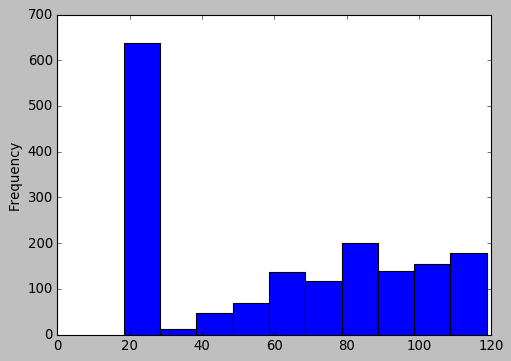

In [263]:
plt.figure(figsize=(7,5))
df_telco_2yr.monthly_charges.plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c23dc0ef0>]],
      dtype=object)

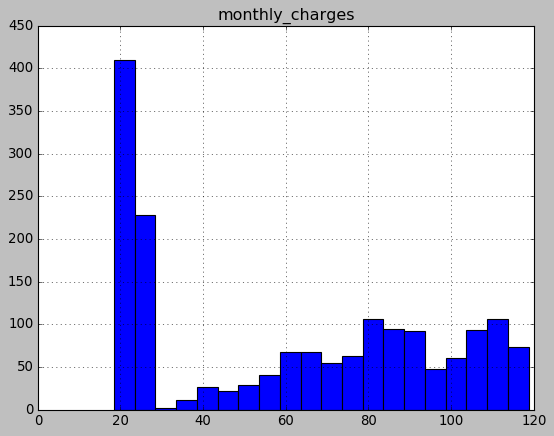

In [347]:
df_telco_2yr.hist(column='monthly_charges', bins=20)

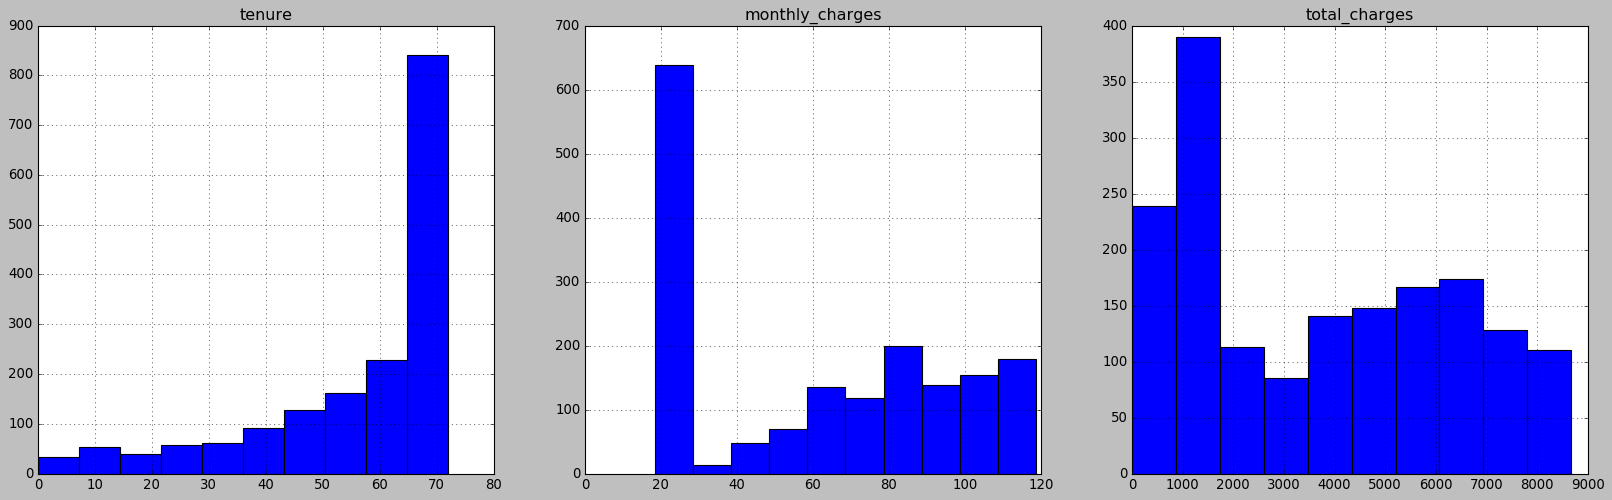

In [264]:
plt.figure(figsize=(25,7))
for i, col in enumerate(['tenure', 'monthly_charges','total_charges']):
    plot_number = i + 1
    series = df_telco_2yr[col]
    plt.subplot(1, 3, plot_number)
    plt.title(col)
    series.hist(bins=10, density=False, cumulative=False, log=False)

Create a new dataframe that contains tenure, monthly charges, and total charges, but not the customer id.

In [265]:
df_new_telco = df_telco_2yr.drop(columns=['customer_id'])
df_new_telco.head()

,tenure,monthly_charges,total_charges
0,71,109.70,7904.25
1,63,84.65,5377.80
2,65,90.45,5957.90
3,54,45.20,2460.55
4,72,116.80,8456.75


Create a box plot of each variable in your new dataframe.

This should be a single chart with 3 categorical plots, 1 each for tenure, monthly charges, total charges.

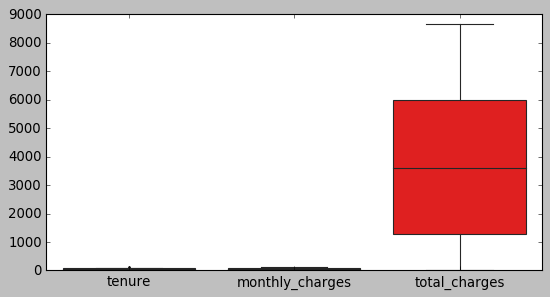

In [266]:
plt.figure(figsize=(8,4))

sns.boxplot(data=df_new_telco)

# use subplts here
# or convert to logarithmic scale
# look in classroom notes on how to do this... make this work.

Split your data into a test and train dataset.

Set the random_state to 123.

You should end up with 4 dataframes: X_train, X_test, y_train, y_test.

In [267]:
# test_train_split
# X = df_grades.drop(['final_grade','student_id'], axis=1)
# y = df_grades[['final_grade']]
# # X = df_grades.drop(['final_grade','student_id'], axis=1)
# # y = df_grades[['final_grade']]

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

# train = pd.concat([X_train, y_train], axis=1)
# test = pd.concat([X_test, y_test], axis=1)

# train_test_split
X = df_new_telco.drop(['total_charges'], axis=1)
y = df_new_telco[['total_charges']]

print(X.head())
print(y.head())

   tenure  monthly_charges
0      71           109.70
1      63            84.65
2      65            90.45
3      54            45.20
4      72           116.80
   total_charges
0        7904.25
1        5377.80
2        5957.90
3        2460.55
4        8456.75


In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)
print('\n')

test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Train columns:  ['tenure', 'monthly_charges', 'total_charges']
Train dimensions (rows, columns): (1356, 3)


Test columns:  ['tenure', 'monthly_charges', 'total_charges']
Test dimensions (rows, columns): (339, 3)


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [269]:
if X_train.shape[0] == y_train.shape[0]:
    print('X & y train rows ARE INDEED equal')
else:
    print('X & y train rows are NOT equal')

if X_test.shape[0] == y_test.shape[0]:
    print('X & y test rows ARE INDEED equal')
else:
    print('X & y test rows are NOT equal')

if train.shape[1] == test.shape[1]:
    print('Number of columns in train & test ARE INDEED equal')
else:
    print('Number of columns in train & test are NOT equal')


train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print('Train Split: %.2f' % train_split)
print('Test Split: %.2f' % test_split)

X & y train rows ARE INDEED equal
X & y test rows ARE INDEED equal
Number of columns in train & test ARE INDEED equal
Train Split: 0.80
Test Split: 0.20


#### 3. Using the in-sample data (X_train and y_train):

Create a scatterplot for each combination of variables.

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


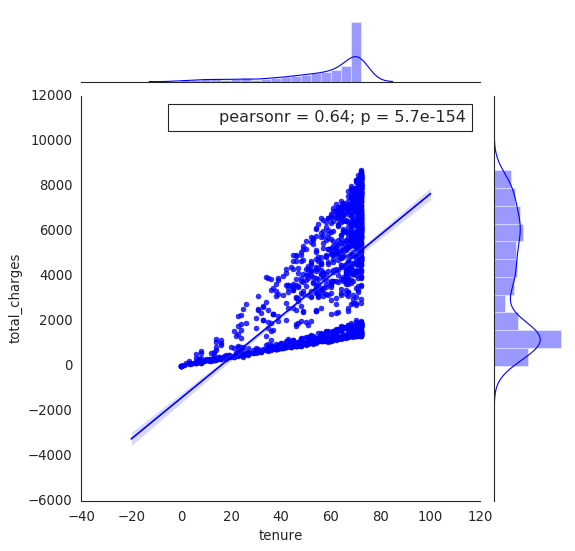

In [270]:
with sns.axes_style('white'):
    j = sns.jointplot('tenure', 'total_charges', data=train, kind='reg', height=7);
    j.annotate(stats.pearsonr)
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


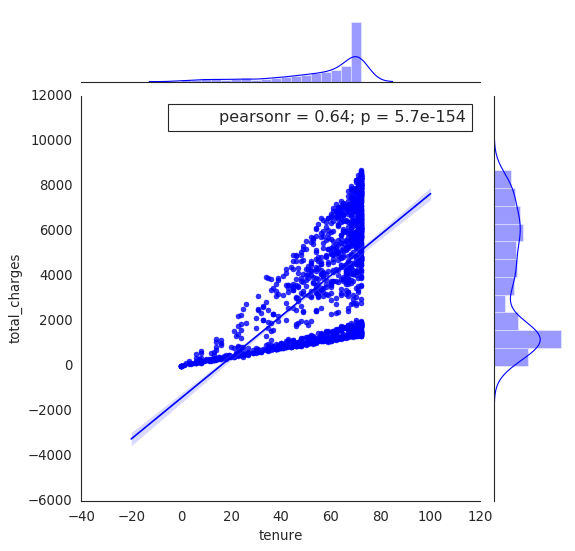

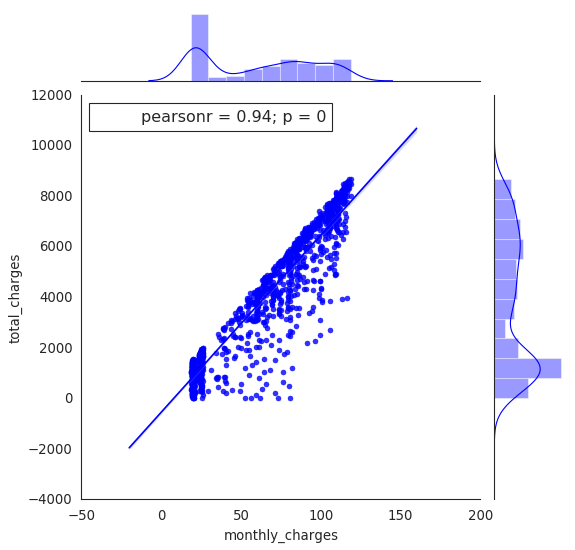

In [271]:
for i, col in enumerate(['tenure', 'monthly_charges']):
       with sns.axes_style('white'):
            plot_number = i + 1
            series = df_new_telco[col]
            j = sns.jointplot(train[col], "total_charges", data=train, kind='reg', height=7)
            j.annotate(stats.pearsonr)
plt.show()

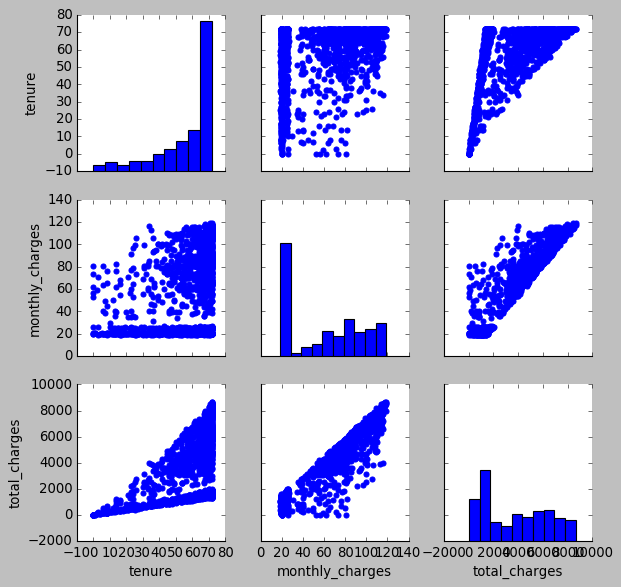

In [272]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

Create a heatmap containing the 3 variables.

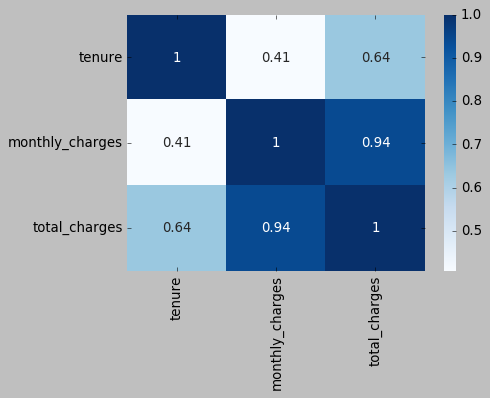

In [273]:
plt.figure(figsize=(6,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

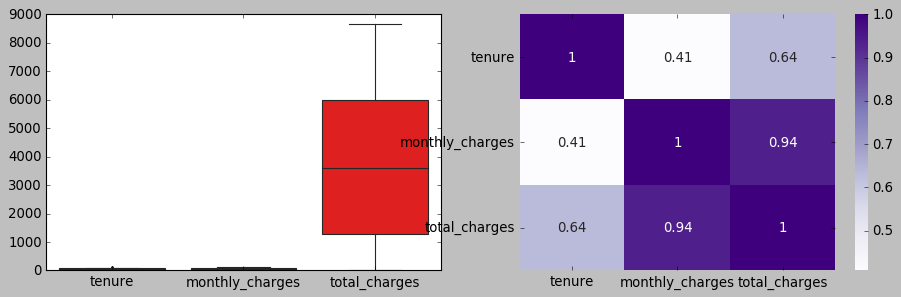

In [274]:
ig, ax = plt.subplots(1,2,figsize=(14,4))

sns.boxplot(data=df_new_telco, ax=ax[0])
sns.heatmap(train.corr(), ax=ax[1], annot=True, cmap='Purples')
plt.show()

Compute pearson's correlation coefficient and print it's value in the sentence:


"Pearson's R is ____ with a significance p-value of ____"

In [275]:
pearsonr(X_train[['tenure']], y_train)

#print("Pearson's R is __ with a significance p-value of __")

# correlation coefficient and the p-value are the two arrays below

(array([0.63500211]), array([5.69213682e-154]))

In [276]:
pearsonr(X_train[['monthly_charges']], y_train)

#print("Pearson's R is __ with a significance p-value of __")

(array([0.94171495]), array([0.]))

In [277]:
[[column, pearsonr(train[column], train.total_charges)] for column in X_train]

[['tenure', (0.6350021065102249, 5.692136817600413e-154)],
 ['monthly_charges', (0.9417149491320433, 0.0)]]

In [278]:
# This below is wrong... figure out how to string this together properly:

print(f'Pearson''s R is {} with a significance p-value of {}.'.format(train.monthly_charges, train.total_charges))

Pearsons R is 909      85.90
550     105.55
1173    110.60
5       101.30
1536    110.15
1331     59.75
1094    108.10
1078     85.30
737      24.25
119      75.50
1411     24.65
937      70.10
1380     56.75
1419     66.50
1022     20.50
1265     19.55
1655    113.20
1362    111.15
1645     20.15
1466     95.90
633      67.25
1066     81.00
738      19.90
1135     80.90
776      20.20
1324     19.65
1323     96.55
1117     86.45
933      90.35
732      76.15
         ...  
2        90.45
451      53.10
1092     95.20
1232    108.60
608     113.25
420     103.20
1277     48.70
846      19.85
1363    113.95
1433     20.55
111      20.20
224      19.35
942      99.05
1568     20.00
73       80.60
47       26.40
638     109.50
113      21.00
96       23.90
1238     34.20
1593     19.95
1147     20.55
106      19.20
1619    106.75
1041     69.95
1122     88.70
1346     25.15
1406     39.15
1389     83.20
1534     20.15
Name: monthly_charges, Length: 1356, dtype: float64 with a significance

In [279]:


# Need to make the above item print out correctly per the instructions for this problem.




In [280]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_charges   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.689e+04
Date:                Wed, 20 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:02:16   Log-Likelihood:                -11134.
No. Observations:                1356   AIC:                         2.227e+04
Df Residuals:                    1354   BIC:                         2.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
tenure              7.7532      0.885      8.764      0.000       6.018       9.489
monthly_charges    57.4366      0.752     76.399      0.000      55.962      58.911
==============================================================================
Omnibus:                      233.389   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.251
Skew:                          -0.961   Prob(JB):                    4.37e-116
Kurtosis:                       5.390   Cond. No.                         4.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [281]:
# start here on problem 3.d. on Wednesday morning

Train (aka fit) a linear regression model, modeling total charges as a linear function of tenure.

In [282]:
lm1 = LinearRegression(fit_intercept=False)
print(lm1)

# setting 'LinearRegression(fit_intercept=False)' sets the y-intercept to zero

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)


In [283]:
# this is fitting the model we created yesterday morning (upper area of code),
# using the exam1 field from the X_train df as the 'X', and y_train as the 'y'.

lm1.fit(X_train[['tenure']], y_train)
print(lm1)

# below creates the coefficient values for the y-intercept and the respective coefficients for each X:
lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)
0.0
[[67.81557644]]


What is the y-intercept of the regression line?

Translate the intercept in plain english, i.e. what is means in the context of the data.

In [284]:
# The y-intercipt is now zero, as I set it zero, based on "LinearRegression(fit_intercept=False)"
# The intercept tells where the linear model predicts total_charges (y) would be when tenure (x) is 0.

In [285]:
print('For considering "tenure" as the x, and total_charges as the y: ')
print('Univariate - total_charges = b + m * tenure')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

For considering "tenure" as the x, and total_charges as the y: 
Univariate - total_charges = b + m * tenure
    y-intercept (b): 0.00
    coefficient (m): 67.82



What the slope of the regression line? Translate the slope in plain english, i.e. what is means in the context of the data.

In [286]:
# The slope of the regression line is the coefficient for (x) or "tenure", which is 67.82.
# This means that for every incremental increase in tenure (month), the total charges increase by $67.82
# The slope means:  the change in y over change in x.

using sklearn.mean_squared_error and sklearn.r2_score.

Evaluate the model's performance using r-squared, mean squared error, and median absolute error.

Evaluation of regression models

Sum of Squared Error

...a.k.a. the residual sum of squares, the sum of squared residuals. It is a measure of the discrepancy between the data and an estimation model. A small RSS indicates a tight fit of the model to the data.

In [287]:
# This makes predictions based on the model created above.
# This step must be done here in order to enable running MSE, MAE, tests, etc.

y_pred_lm1 = lm1.predict(X_train[['tenure']])
print(y_pred_lm1.min())
print(y_pred_lm1.max())

0.0
4882.721503813598


In [288]:
# MSE:

mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print('lm1\n  mse: {:.3}'.format(mse_lm1))

lm1
  mse: 4.21e+06


MSE is nothing but your loss function. It is used to compare different estimators by comparing the value of MSE of them.

Or also called as variance, which gives you intuition of the best fit estimate.

Lesser the MSE => smaller is the error => better the estimator.

In [289]:
# MAE:

from sklearn.metrics import median_absolute_error
mae_lm1 = median_absolute_error(y_train, y_pred_lm1)

print('lm1\n  mae: {:.3}'.format(mae_lm1))

lm1
  mae: 1.73e+03


The median absolute error is useful.  Basically it is essentially insensitive to outliers (as long as there aren't too many of them). This is because it is the MEDIAN of all of the absolute values of the residuals, and the median is unaffected by values at the tails.

Coefficient of Determination


...aka R-Squared, measures the fraction of the total variation in the dependent variable that is captured by the model.

In [290]:
# r-squared values:

r2_lm1 = r2_score(y_train, y_pred_lm1)
print('  {:.2%} of the variance of the telco total_charges can be explained by telco customer tenure.'.format(r2_lm1))

  37.46% of the variance of the telco total_charges can be explained by telco customer tenure.


As a yardstick, REMEMBER:

R square > .5 (or "50%"),

F stat significance < 0.05

p value < 0.05

If all true, this is a good fit and THESE RESULTS ARE RELIABLE.

Write the linear function in the form of 
y
=
m
x
+
b
 using the parameters that were estimated from the algorithm and the variable names for y and x specific to your data.

In [291]:
#  Linear function expressed:

#  y = mx + b
#  total_charges = b + m * tenure

#  so:  total_charges(y) = ((coefficient(m) 67.82 * tenure(x)) + y_intercept(b) 0.00)
#  y = 67.82 * x + 0.0

Test your model on the training sample. That is, use your newly fit model to predict the total charges using tenure.

Text(0.5, 1.0, 'Predicted vs Actual Total Costs')

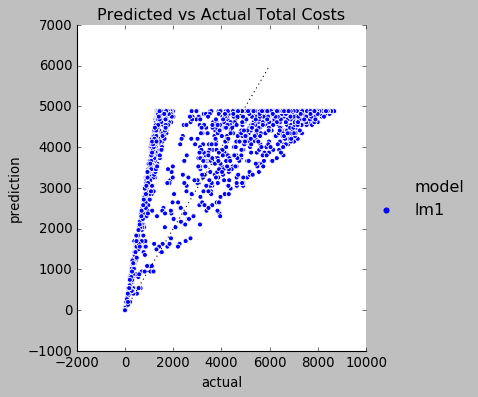

In [292]:
# "predictions plot" section:

pd.DataFrame({'actual': y_train.total_charges,
             'lm1': y_pred_lm1.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')
            # " 'lm2': y_pred_lm2.ravel()})\ "   ...add this in if I need to add another x coeff. lm2, lm3, etc
            # See this same problem on the Regression_grades_exercise.ipynb from yesterday.

plt.plot([0, 6000],[0, 6000], c='black', ls=':')
plt.title('Predicted vs Actual Total Costs')

In [293]:
# Make predictions using the training set
y_pred_lm1 = lm1.predict(X_train[['tenure']])

print('Predicted total_costs associated with y_pred_lm1:\n')
print(y_pred_lm1.min())
print(y_pred_lm1.max())

Predicted total_costs associated with y_pred_lm1:

0.0
4882.721503813598


Text(0, 0.5, 'Residuals')

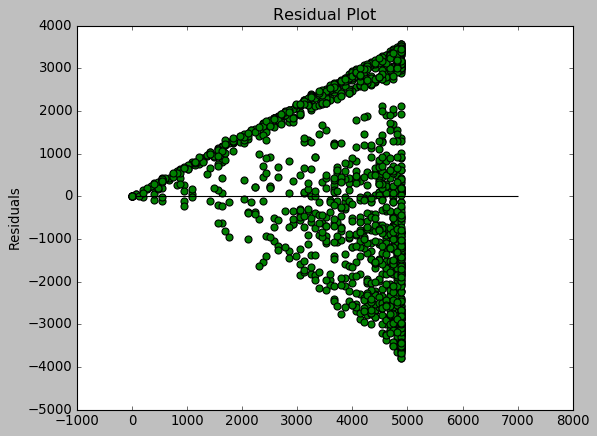

In [294]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_train, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=7000)
plt.title('Residual Plot')
plt.ylabel('Residuals')

## Question 4.  Using the out-of-sample data (X_test, y_test)

Test your model on the test sample.

In [304]:
# Make predictions using the X_test testing set
# this step is important here.

y_pred_lm1 = lm1.predict(X_test[['tenure']])

print('Predicted total_costs associated with y_pred_lm1:\n')
print(y_pred_lm1.min())
print(y_pred_lm1.max())

Predicted total_costs associated with y_pred_lm1:

0.0
4819.7880859601455


In [305]:
# this is fitting the model we created yesterday morning (upper area of code),
# using the exam1 field from the X_train df as the 'X', and y_train as the 'y'.

lm1.fit(X_test[['tenure']], y_test)
print(lm1)

# below creates the coefficient values for the y-intercept and the respective coefficients for each X:
lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)
0.0
[[66.94150119]]


Evaluate your model's performance on test sample. How do each of the metrics compare to that of the training sample? How can you explain the reason for the difference?

In [306]:
print('For considering "tenure" as the x, and total_charges as the y: ')
print('Univariate - total_charges = b + m * tenure')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

For considering "tenure" as the x, and total_charges as the y: 
Univariate - total_charges = b + m * tenure
    y-intercept (b): 0.00
    coefficient (m): 66.94



Evaluation of regression models

Sum of Squared Error

...a.k.a. the residual sum of squares, the sum of squared residuals. It is a measure of the discrepancy between the data and an estimation model. A small RSS indicates a tight fit of the model to the data.

In [307]:
# MSE:

mse_lm1 = mean_squared_error(y_test, y_pred_lm1)
print('lm1\n  mse: {:.3}'.format(mse_lm1))

lm1
  mse: 3.88e+06


MSE is nothing but your loss function. It is used to compare different estimators by comparing the value of MSE of them.

Or also called as variance, which gives you intuition of the best fit estimate.

Lesser the MSE => smaller is the error => better the estimator.

In [309]:
# MAE:

from sklearn.metrics import median_absolute_error
mae_lm1 = median_absolute_error(y_test, y_pred_lm1)

print('lm1\n  mae: {:.3}'.format(mae_lm1))

lm1
  mae: 1.61e+03


Coefficient of Determination


...aka R-Squared, measures the fraction of the total variation in the dependent variable that is captured by the model.

In [310]:
# r-squared values:

r2_lm1 = r2_score(y_test, y_pred_lm1)
print('  {:.2%} of the variance of the telco total_charges can be explained by telco customer tenure.'.format(r2_lm1))

  38.38% of the variance of the telco total_charges can be explained by telco customer tenure.


As a yardstick, REMEMBER:

R square > .5 (or "50%"),

F stat significance < 0.05

p value < 0.05

If all true, this is a good fit and THESE RESULTS ARE RELIABLE.

In [ ]:
# Answer:  the r2 here for the TEST data is .3838, less than the 0.5 normally desired.
# The r2 for the TRAINING data is also low, at .3746. again, less than the 0.5 normally desired.

In [ ]:
Training coefficient (m): 67.82
Test coefficient (m): 66.94

Train r2 = 
Test r2 = 38.38% 

Calculate the p-value of the regressor for the train and test sample. Hint: f_regression

In [ ]:
from sklearn.feature_selection import f_regression

In [338]:
f_regression(X_test[['tenure']], y_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([231.6718391]), array([3.48651193e-40]))

In [333]:
# 'first array'  -  F: array, shape=(n_features,)
# This is the: 'F values of features.'

# 'second array'  -  pval : array, shape=(n_features,)
# This is the: 'p-values of F-scores.'

In [312]:
# Notice, this p-value below (second array below) is the same p-value as the p-value shown above,
# using the "f_regression(X_test[['tenure']], y_test)" command

pearsonr(X_test[['tenure']], y_test)

#print("Pearson's R is {} with a significance p-value of {}")
# below is the Pearson's R with the p-Value

(array([0.63827195]), array([3.48651193e-40]))

In [320]:
ols_model = sm.OLS(y_test, X_test)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_charges   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     4367.
Date:                Wed, 20 Mar 2019   Prob (F-statistic):          1.09e-241
Time:                        14:33:59   Log-Likelihood:                -2769.1
No. Observations:                 339   AIC:                             5542.
Df Residuals:                     337   BIC:                             5550.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
tenure              8.0270      1.731      4.636      0.000       4.621      11.433
monthly_charges    56.7876      1.488     38.170      0.000      53.861      59.714
==============================================================================
Omnibus:                       36.090   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.815
Skew:                          -0.682   Prob(JB):                     7.58e-13
Kurtosis:                       4.446   Cond. No.                         4.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Create a scatter plot of the predicted values versus the actual values in the test sample.

Text(0.5, 1.0, 'Predicted vs Actual Total Costs')

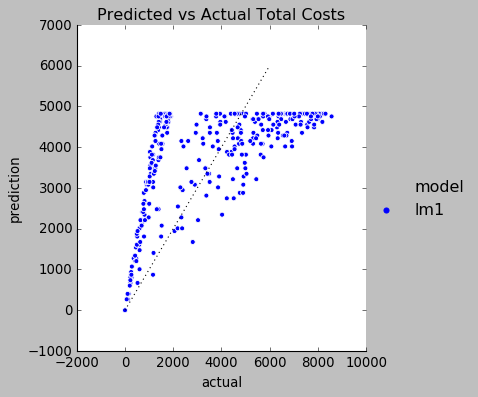

In [321]:
# "predictions plot" section:

pd.DataFrame({'actual': y_test.total_charges,
             'lm1': y_pred_lm1.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')
            # " 'lm2': y_pred_lm2.ravel()})\ "   ...add this in if I need to add another x coeff. lm2, lm3, etc
            # See this same problem on the Regression_grades_exercise.ipynb from yesterday.

plt.plot([0, 6000],[0, 6000], c='black', ls=':')
plt.title('Predicted vs Actual Total Costs')

Create a scatter plot of the actual values of x and y in the test sample with the regression line layered over

In [ ]:
# use this code here, to replace the thing below:

# COMPARE THE 2 MODELS
# We can visualize the predictions by plotting the predictions vs the actual values:

# # the predictions are a 1 x 83 two dimensional matrix, but we want just
# # a single array of predictions. We can use the .ravel method to achieve
# # this.

# pd.DataFrame({'actual': y_train.final_grade,
#               'lm1': y_pred_lm1.ravel(),
#               'lm2': y_pred_lm2.ravel()})\
#     .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
#     .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

# plt.plot([60, 100], [60, 100], c='black', ls=':')
# plt.ylim(60, 100)
# plt.xlim(60, 100)
# plt.title('Predicted vs Actual Final Grade')


# look for Joseph's post in the slack for the code to do this.

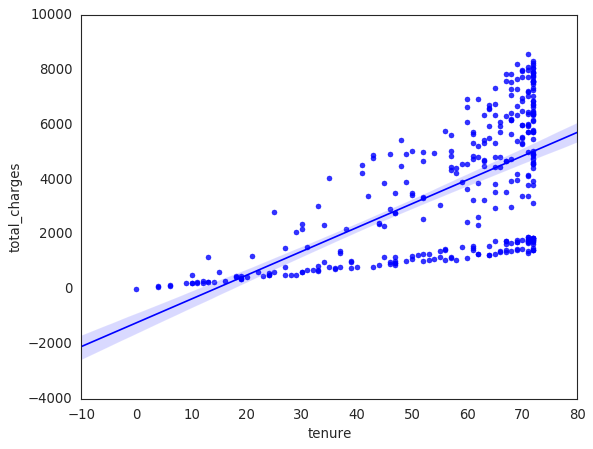

In [332]:
with sns.axes_style('white'):
    j = sns.regplot('tenure', 'total_charges', data=test);
plt.show()

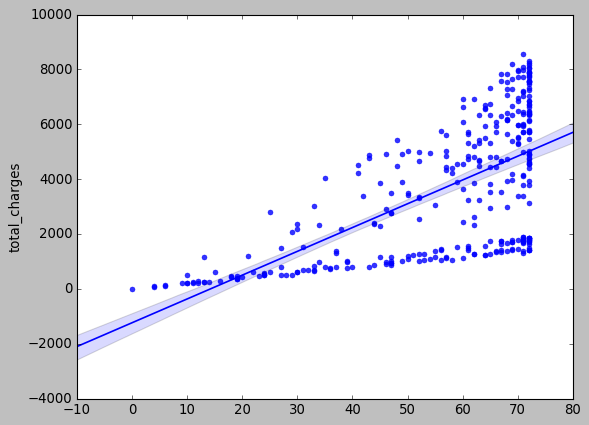

In [331]:
sns.regplot(X_test[['tenure']], y_test.total_charges, data=test);
plt.show()

Create a scatter plot of the residuals (x axis: predicted values of final grade, y axis: the residual values (remember definition of residual from previous lesson). Layer over it a horizonal line that represents no residual.

Text(0, 0.5, 'Residuals')

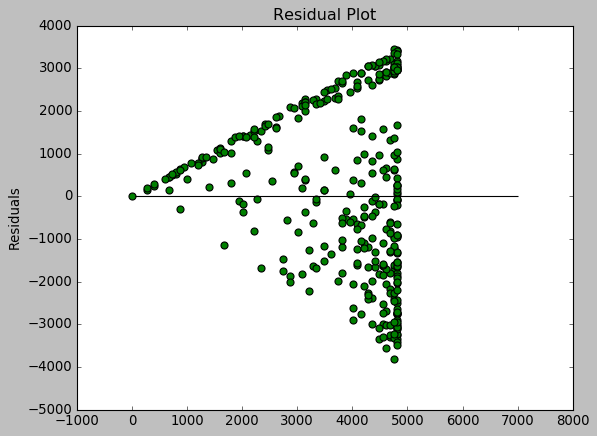

In [328]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=7000)
plt.title('Residual Plot')
plt.ylabel('Residuals')